In [1]:
!pip install transformers
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=75f639bed3a9fc4b20c45cdb678c5f02294cc9f599993e880d181a63cbe6dd61
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, AutoModelForSeq2SeqLM
from transformers import pipeline
from rouge_score import rouge_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")

In [12]:
data = pd.read_csv('reference_summary_original_text.csv')

gold_summary = data['Enforcement Summary'].to_list()
original_text = data['text_extracted'].to_list()

In [38]:
data.iloc[1]['Generate_summary_Bart']

'SageTrader has been a FINRA member since May 2006. FINRA found that the firm failed to reasonably supervise for potentially manipulative trading from 2013 through 2019. The AWC imposed a censure and a fine of $775,000 (paid to FINRA and eight exchanges) The firm considered two of the four customers to be high AML risk. The firm’s market participant identifiers (MPIDs) were used to route orders to anAlternative trading system and to exchanges. SageTrader failed to establish and implement AML policies and procedures reasonably expected to detect and cause the reporting of suspicious activity.'

In [34]:
result_BART

,Rouge1 F1 score,Rouge2 F1 score,RougeL F1 score,Cosine Similarity,Meteor,BLEU
0,0.560510,0.309677,0.292994,0.531333,0.349328,2.539629e-01
1,0.666667,0.472362,0.378109,0.769055,0.445065,4.032263e-01
2,0.557769,0.425703,0.326693,0.623530,0.398561,2.934731e-01
3,0.454545,0.366197,0.419580,0.696170,0.257864,1.274501e-01
4,0.391960,0.243655,0.301508,0.557241,0.254346,2.094808e-01
5,0.411765,0.158416,0.264706,0.500499,0.205164,1.305705e-01
6,0.456432,0.276151,0.356846,0.638044,0.315781,2.560856e-02
7,0.551084,0.461059,0.520124,0.659122,0.381259,1.808724e-01
8,0.343137,0.198020,0.254902,0.429229,0.160922,8.687488e-02
9,0.327103,0.066038,0.168224,0.422049,0.164630,2.830943e-155


In [3]:
data = pd.read_csv('reference_with_bart.csv')
gold_summary = data['Enforcement Summary'].to_list()
original_text = data['text_extracted'].to_list()

In [6]:
Bart_summary = data['Generate_summary_Bart'].to_list()

In [15]:
generate_summary = []

for i in original_text:
  text = pipe(i, truncation=True, min_length=100, do_sample=False)
  generate_summary.append(text)

generate_summary = [i[0]['summary_text'] for i in generate_summary]

In [7]:
import zipfile

zip_file_path = 'chatGPT(1).zip'

# Decompress the ZIP file in the current working directory.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
import zipfile

zip_file_path = 'Claude.zip'

# Decompress the ZIP file in the current working directory.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
GPT_data = pd.read_csv('/content/chatGPT/chatGPT_summaries.csv')
GPT_summary = GPT_data['gpt_summary'].to_list()

In [14]:
claude_data = pd.read_csv('/content/Claude/claude_summaries.csv')
claude_summary = claude_data['claude_summary'].to_list()

In [15]:
def Calculate_Traditional_Metrics(reference_list, generate_list):
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
  vectorizer = TfidfVectorizer()

  rouge1 = []
  rouge2 = []
  rougeL = []
  cos_sim_gold_w_generated = []
  meteor = []
  bleu = []

  n = len(reference_list)
  for i in range(n):
    scores = scorer.score(reference_list[i], generate_list[i])
    rouge1.append(scores['rouge1'].fmeasure)
    rouge2.append(scores['rouge2'].fmeasure)
    rougeL.append(scores['rougeL'].fmeasure)

    tfidf_matrix = vectorizer.fit_transform([reference_list[i], generate_list[i]])
    cos_sim_gold_w_generated.append(float(cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])))

    score = meteor_score([reference_list[i].split()], generate_list[i].split())
    meteor.append(score)

    score = sentence_bleu([word_tokenize(reference_list[i])], word_tokenize(generate_list[i]))
    bleu.append(score)

  return rouge1, rouge2, rougeL, cos_sim_gold_w_generated, meteor, bleu

In [16]:
rouge1_GPT, rouge2_GPT, rougeL_GPT, cos_sim_gold_w_GPT, meteor_GPT, bleu_GPT = Calculate_Traditional_Metrics(gold_summary, GPT_summary)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [17]:
rouge1_BART, rouge2_BART, rougeL_BART, cos_sim_gold_w_BART, meteor_BART, bleu_BART = Calculate_Traditional_Metrics(gold_summary, Bart_summary)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [18]:
rouge1_claude, rouge2_claude, rougeL_claude, cos_sim_gold_w_claude, meteor_claude, bleu_claude = Calculate_Traditional_Metrics(gold_summary, claude_summary)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [19]:
result_GPT = pd.DataFrame()
result_GPT['Rouge1 F1 score'] = rouge1_GPT
result_GPT['Rouge2 F1 score'] = rouge2_GPT
result_GPT['RougeL F1 score'] = rougeL_GPT
result_GPT['Cosine Similarity'] = cos_sim_gold_w_GPT
result_GPT['Meteor'] = meteor_GPT
result_GPT['BLEU'] = bleu_GPT

In [20]:
result_BART = pd.DataFrame()
result_BART['Rouge1 F1 score'] = rouge1_BART
result_BART['Rouge2 F1 score'] = rouge2_BART
result_BART['RougeL F1 score'] = rougeL_BART
result_BART['Cosine Similarity'] = cos_sim_gold_w_BART
result_BART['Meteor'] = meteor_BART
result_BART['BLEU'] = bleu_BART

In [21]:
result_claude = pd.DataFrame()
result_claude['Rouge1 F1 score'] = rouge1_claude
result_claude['Rouge2 F1 score'] = rouge2_claude
result_claude['RougeL F1 score'] = rougeL_claude
result_claude['Cosine Similarity'] = cos_sim_gold_w_claude
result_claude['Meteor'] = meteor_claude
result_claude['BLEU'] = bleu_claude

In [31]:
result_claude.mean()

Rouge1 F1 score      0.476692
Rouge2 F1 score      0.212646
RougeL F1 score      0.312844
Cosine Similarity    0.498904
Meteor               0.291040
BLEU                 0.112680
dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def Boxplot_for_Scores(ax, data, title, labels=['Facebook Bart', 'ChatGPT 4', 'Claude']):
  sns.set(style="whitegrid")
  sns.boxplot(data=data, palette="Set3", width=0.5, ax=ax)
  ax.set_title(title, fontsize=16)
  ax.set_ylabel('Score', fontsize=14)
  ax.set_xticks(range(len(labels)))
  ax.set_xticklabels(labels, fontsize=12)
  ax.grid(True, linestyle="--", alpha=0.7)

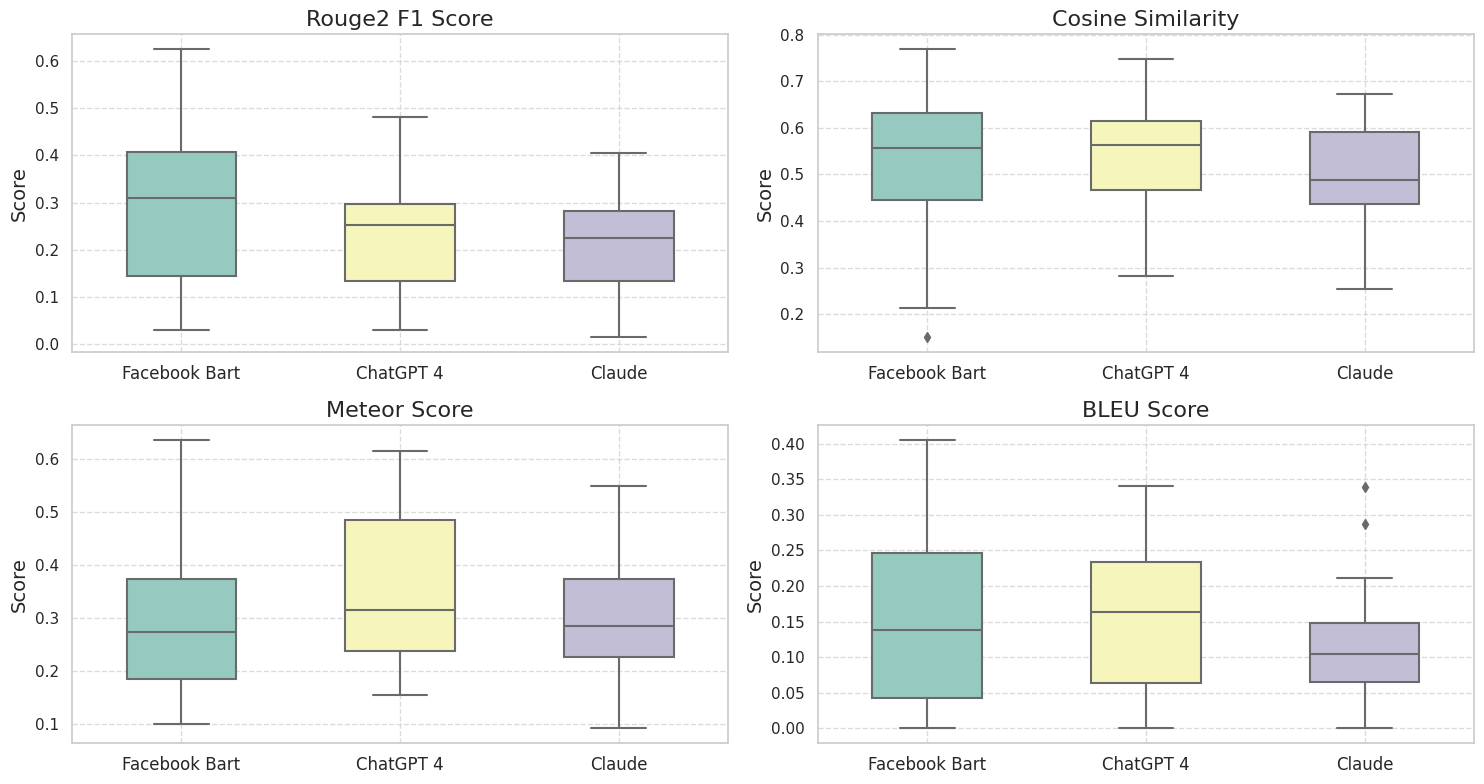

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

Boxplot_for_Scores(axes[0, 0], [rouge2_BART, rouge2_GPT, rouge2_claude], 'Rouge2 F1 Score')
Boxplot_for_Scores(axes[0, 1], [cos_sim_gold_w_BART, cos_sim_gold_w_GPT, cos_sim_gold_w_claude], 'Cosine Similarity')
Boxplot_for_Scores(axes[1, 0], [meteor_BART, meteor_GPT, meteor_claude], 'Meteor Score')
Boxplot_for_Scores(axes[1, 1], [bleu_BART, bleu_GPT, bleu_claude], 'BLEU Score')
plt.tight_layout()

plt.show()

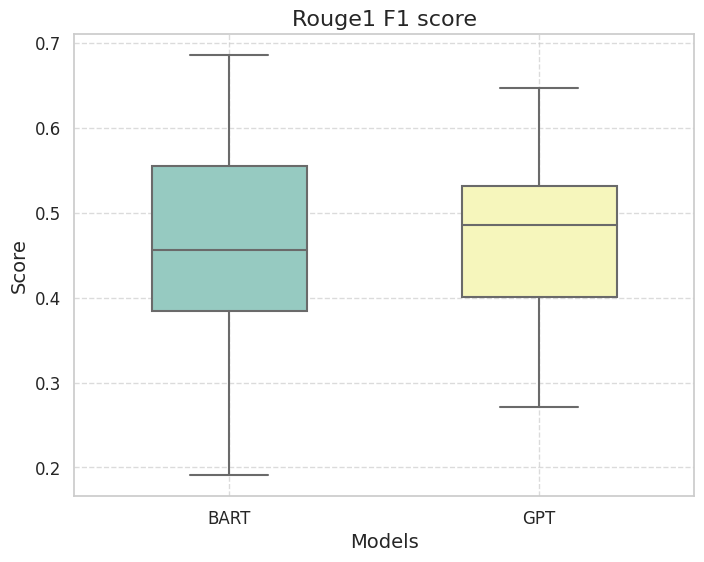

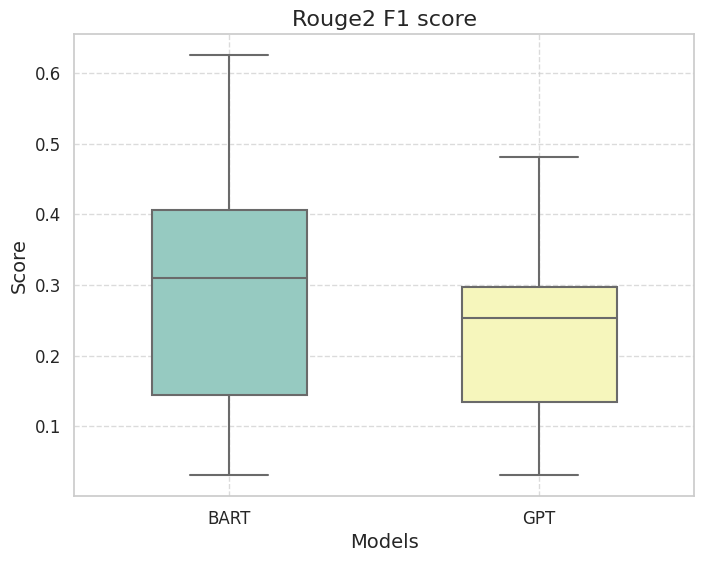

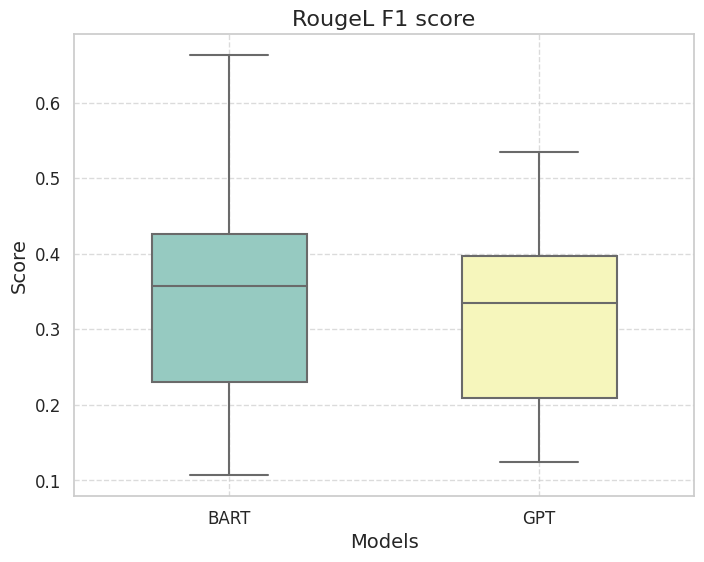

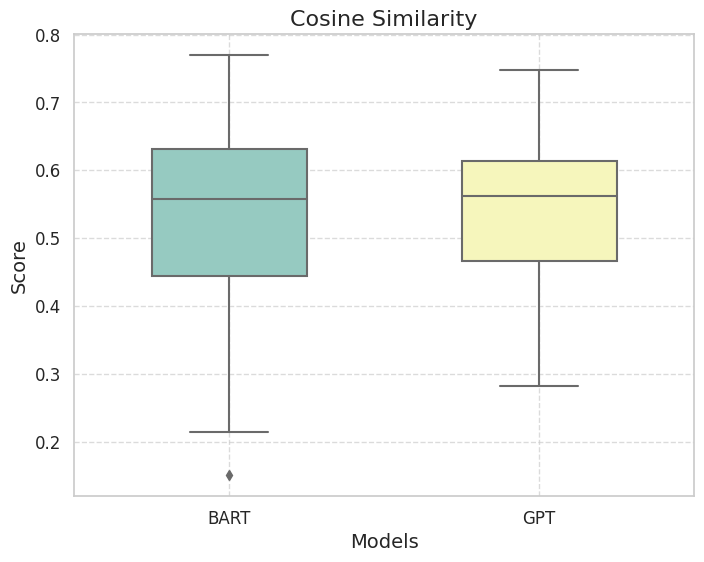

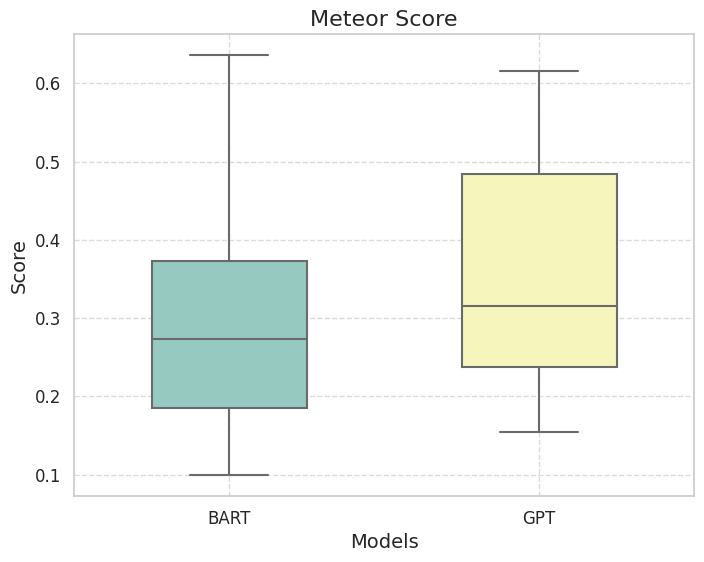

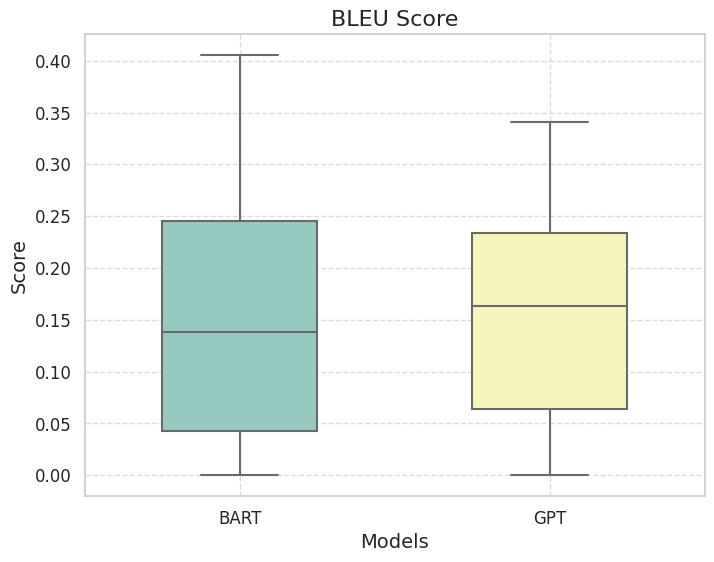

In [55]:
Boxplot_for_Scores([rouge1_BART, rouge1_GPT], 'Rouge1 F1 score')
Boxplot_for_Scores([rouge2_BART, rouge2_GPT], 'Rouge2 F1 score')
Boxplot_for_Scores([rougeL_BART, rougeL_GPT], 'RougeL F1 score')
Boxplot_for_Scores([cos_sim_gold_w_BART, cos_sim_gold_w_GPT], 'Cosine Similarity')
Boxplot_for_Scores([meteor_BART, meteor_GPT], 'Meteor Score')
Boxplot_for_Scores([bleu_BART, bleu_GPT], 'BLEU Score')

In [24]:
result.to_csv('Bart_result.csv')

In [26]:
data['Generate_summary_Bart'] = generate_summary

In [28]:
data.to_csv('reference_with_bart.csv')

In [47]:
rouge2_dist = rouge2_BART + rouge2_claude + rouge2_GPT
rouge2_dist = sorted(rouge2_dist)
rouge2_dist[int(len(rouge2_dist)*0.95)+1:]

[0.48068669527896996, 0.5, 0.5496688741721855, 0.6250000000000001]

In [46]:
cos_sim_gold_w_dist = cos_sim_gold_w_BART + cos_sim_gold_w_claude + cos_sim_gold_w_GPT
cos_sim_gold_w_dist = sorted(cos_sim_gold_w_dist)
cos_sim_gold_w_dist[int(len(cos_sim_gold_w_dist)*0.95)+1:]

[0.7210562629775367,
 0.7483709501782088,
 0.7690545284123139,
 0.7696107028216674]